In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('covid_impact_on_airport_traffic.csv')

In [ ]:
data.head()

AggregationMethod  ...                                          Geography
0             Daily  ...  POLYGON((151.164354085922 -33.9301772341877, 1...
1             Daily  ...  POLYGON((151.164354085922 -33.9301772341877, 1...
2             Daily  ...  POLYGON((151.164354085922 -33.9301772341877, 1...
3             Daily  ...  POLYGON((151.164354085922 -33.9301772341877, 1...
4             Daily  ...  POLYGON((151.164354085922 -33.9301772341877, 1...

[5 rows x 11 columns]

In [ ]:
data.info()  # there are no null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [ ]:
data.describe()

Version  PercentOfBaseline
count   7247.0        7247.000000
mean       1.0          66.651442
std        0.0          22.134433
min        1.0           0.000000
25%        1.0          53.000000
50%        1.0          67.000000
75%        1.0          84.000000
max        1.0         100.000000

In [ ]:
data['Country'].unique()   # the data is only from 4 countries

array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

In [ ]:
pd.DatetimeIndex(data['Date']).year.unique()    # data is only from year 2020

Int64Index([2020], dtype='int64', name='Date')

In [ ]:
sorted(pd.DatetimeIndex(data['Date']).month.unique())  # data is after the 3rd moth i.e. after march 2020

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
data['month'] = pd.DatetimeIndex(data['Date']).month.values   # extracting only month from the date

In [ ]:
import calendar

In [ ]:
data['month'] = data['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
data.head()

AggregationMethod  ... month
0             Daily  ...   Apr
1             Daily  ...   Apr
2             Daily  ...   Jul
3             Daily  ...   Sep
4             Daily  ...   Oct

[5 rows x 12 columns]

In [ ]:
data.groupby(['month', 'Country']).mean()['PercentOfBaseline']     # group by data based on each month and country

month  Country                       
Apr    Australia                         53.241379
       Canada                            63.391473
       Chile                             19.571429
       United States of America (the)    54.821569
Aug    Australia                         17.793103
       Canada                            76.763158
       Chile                             33.269231
       United States of America (the)    67.717899
Dec    Australia                         24.000000
       Canada                            90.277778
       Chile                             46.500000
       United States of America (the)    75.029412
Jul    Australia                         46.258065
       Canada                            78.300725
       Chile                             31.107143
       United States of America (the)    65.286528
Jun    Australia                         52.517241
       Canada                            80.312030
       Chile                             26.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plotdata = data.groupby(['Country', 'month']).mean()['PercentOfBaseline'].unstack()   # creating a dataframe of percentage of flights relative to the baseline in each month of every country

In [ ]:
plotdata

month                                 Apr        Aug  ...        Oct        Sep
Country                                               ...                      
Australia                       53.241379  17.793103  ...  19.387097  16.400000
Canada                          63.391473  76.763158  ...  83.064516  79.868421
Chile                           19.571429  33.269231  ...  47.806452  37.206897
United States of America (the)  54.821569  67.717899  ...  70.614801  69.096078

[4 rows x 10 columns]

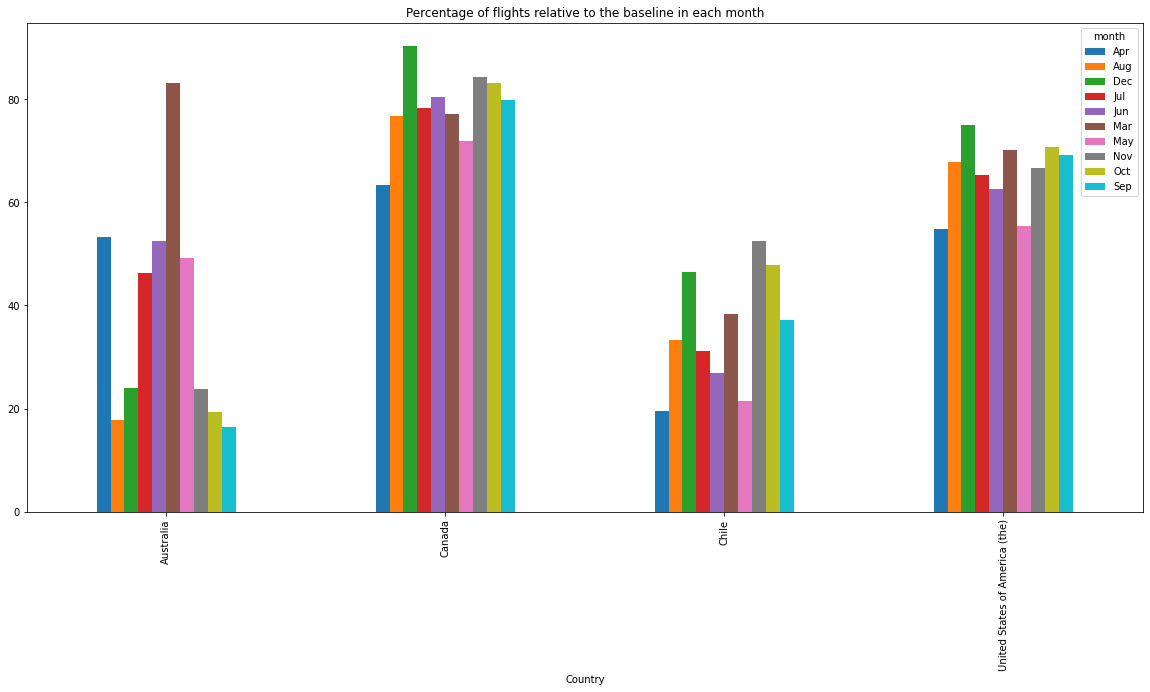

In [ ]:
fig, ax = plt.subplots(figsize=(20,9))
plotdata.plot(ax=ax, kind='bar', title='Percentage of flights relative to the baseline in each month')
plt.show()

As we can observe from the abover plot, the frequncy of flights dropped in March(the beginning of pandemic) but it increased with time as the months progressed. The flight frequency in USA and Canada is much more as compared to Australia and Chile.

In [ ]:
data.head()

AggregationMethod  ... month
0             Daily  ...   Apr
1             Daily  ...   Apr
2             Daily  ...   Jul
3             Daily  ...   Sep
4             Daily  ...   Oct

[5 rows x 12 columns]

In [ ]:
pip install bar_chart_race

     |████████████████████████████████| 156 kB 7.6 MB/s 


Importing the reqired libraries and processing data for bar chart race .

In [ ]:
import bar_chart_race as bcr

In [ ]:
df_values, df_ranks = bcr.prepare_long_data(data, index='Date', columns='Country',
                                            values='PercentOfBaseline', steps_per_period=5)

In [ ]:
df_values.head()

Country     Australia  Canada  Chile  United States of America (the)
Date                                                                
2020-03-16       92.0   831.0   96.0                          1497.0
2020-03-16       91.6   823.0   91.2                          1496.2
2020-03-16       91.2   815.0   86.4                          1495.4
2020-03-16       90.8   807.0   81.6                          1494.6
2020-03-16       90.4   799.0   76.8                          1493.8

In [ ]:
#list(df_values.index)

In [ ]:
Australia = list(df_values.Australia.values)
Canada = list(df_values.Canada.values)
Chile = list(df_values.Chile.values)
USA = list(df_values['United States of America (the)'].values)

In [ ]:
df = pd.DataFrame({'Canada': Canada, "Australia": Australia, "Chile": Chile, "USA": USA, "Date": list(df_values.index)})

In [ ]:
df = df.set_index('Date')

In [ ]:
bcr.bar_chart_race(df=df,filename=None,title= "Flight frequency in various countries during covid")

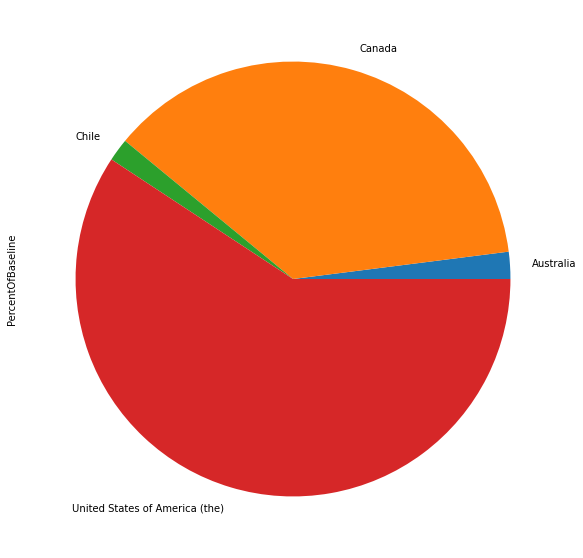

In [ ]:
# As we can observe that the most number of flights are in USA followed by Canada , Australia and then Chile.

fig, ax = plt.subplots(figsize=(10,10))
data.groupby('Country').sum().plot(ax=ax, kind='pie', y='PercentOfBaseline', legend=0)
plt.show()

In [ ]:
len(list(data.AirportName.unique()))

28

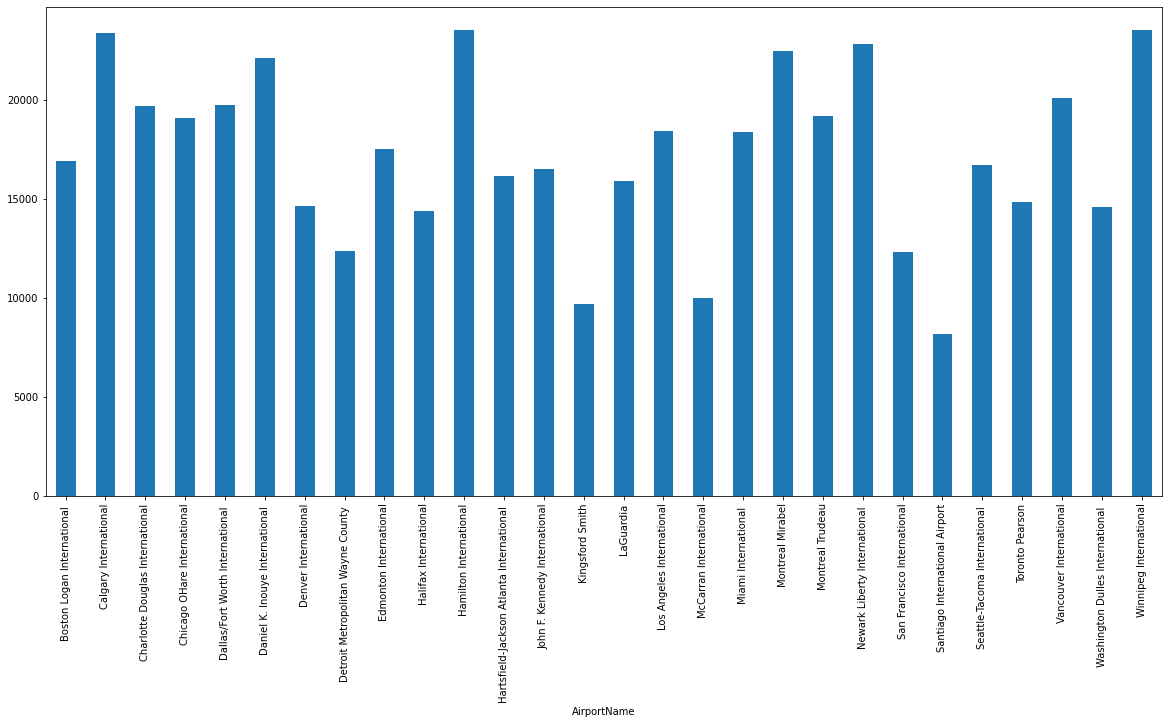

In [ ]:
# these are the number of flights in each Airport
fig, ax = plt.subplots(figsize=(20,9))
data.groupby('AirportName').sum()['PercentOfBaseline'].plot(ax=ax, kind='bar')
plt.show()